# zad_18_1

Stwórz model klasyfikacji, w oparciu o architekturę sieci neuronowych. Naucz model klasyfikować gatunki kwiatów, wykorzystując zbiór Iris. Pamiętaj, że jest to klasyfikacja wieloklasowa, w związku z tym w ostatniej warstwie sieci powinna być funkcja aktywacji Softmax.

In [1]:
# import
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# wczytanie danyc

iris = load_iris()
X = iris.data
y = iris.target


In [3]:
# podzial zbioru na treningowy i testowy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
#standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
#  Konwersja etykiet 
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)


In [ ]:
# deklaracja modelu
model = models.Sequential([
     layers.Input(shape=(X_train.shape[1],)), # 4 cechy wejściowe
     layers.Dense(16, activation='relu'),
     layers.Dense(8, activation='relu'), layers.Dense(3, activation='softmax') # 3 klasy 
     ])

In [7]:
# Kompilacja modelu
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
# Trenowanie
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.3, verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.3151 - loss: 1.0537 - val_accuracy: 0.3750 - val_loss: 1.0239
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3288 - loss: 1.0086 - val_accuracy: 0.4375 - val_loss: 0.9819
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3425 - loss: 0.9732 - val_accuracy: 0.4688 - val_loss: 0.9497
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3562 - loss: 0.9454 - val_accuracy: 0.4375 - val_loss: 0.9241
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.3836 - loss: 0.9230 - val_accuracy: 0.4688 - val_loss: 0.9007
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4658 - loss: 0.9003 - val_accuracy: 0.5312 - val_loss: 0.8769
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5068 - loss: 0.8800 - val_accuracy: 0.6875 - val_loss: 0.8536
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5479 - loss: 0.8602 - val_accuracy: 0.6875 - v

In [9]:
#  Ewaluacja
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Dokładność na zbiorze testowym: {accuracy:.4f}")

Dokładność na zbiorze testowym: 0.9111


In [10]:
# Predykcje na zbiorze testowym
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)   # klasy przewidziane
y_true = np.argmax(y_test, axis=1)         # klasy prawdziwe

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step


In [11]:
#  Raport klasyfikacji
target_names = ["setosa", "versicolor", "virginica"]  # ręczne nazwy klas
print("\nRaport klasyfikacji:\n")
print(classification_report(y_true, y_pred, target_names=target_names))


Raport klasyfikacji:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



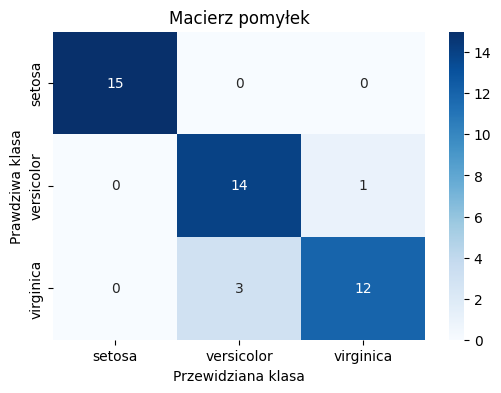

In [12]:
#  Macierz pomyłek
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Przewidziana klasa")
plt.ylabel("Prawdziwa klasa")
plt.title("Macierz pomyłek")
plt.show()

Setosa: 
    precisio = 1 , recall =1  - model zawsze prawidlowo rozpoznaje setosa

versicolor : 
    precision= 0.82 - 82% próbek przewdidzainych jako versicolor było poprawnych
    recall = 93% próbek rzeczywistych versicolor zostało prawidłowo sklasyfikowanych, 
    
virginica : 
    precision= 0.92 - 92% próbek przewdidzainych jako verginica było poprawnych
    recall = 80% modelowi zdarza się nie rozpoznać części rzeczywistych próbek virginica, klasyfikując je np. jako versicolor, 

 91% poprawnych klasyfikacji, co jest dobry wynikiem

